# Linear Regression Model

In [137]:
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [138]:
#Read the csv file into dataframe
finaldf=pd.read_csv('combinedDataset.csv',encoding='utf-8')

In [139]:
finaldf.head()

,N02650,A02650,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,FFR14,RECFAC14
0,34230.0,1659673.0,"54,792","55,416",13.0,34.1,36,5
1,90660.0,5118057.0,"195,147","208,563",10.4,27.4,132,25
2,11480.0,446600.0,"26,938","25,965",18.4,44.4,22,0
3,23170.0,1124762.0,"22,501","22,643",14.8,40.3,5,1
4,63020.0,3023206.0,"57,746","57,704",14.1,34.6,21,3


In [140]:
#Extract the feature columns
X = finaldf.loc[:,'PCT_DIABETES_ADULTS13':].values

In [141]:
print(X)

[[ 13.   34.1  36.    5. ]
 [ 10.4  27.4 132.   25. ]
 [ 18.4  44.4  22.    0. ]
 ...
 [  9.   27.9  16.    2. ]
 [ 12.   27.7   6.    1. ]
 [ 10.   29.2   3.    0. ]]


In [142]:
#Extract the label column
y =finaldf.iloc[:,1].values

In [143]:
print(y)

[1659673. 5118057.  446600. ...  462015.  260964.  373820.]


In [144]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [145]:
#Train the model using the training data
lm = linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [146]:
#Predict the output for the test data
y_predicted = model.predict(X_test)
y_predicted[0:5]

array([10720527.89433778,   794263.19355222,  1435770.38849422,
        3249064.99402954, 31882355.580055  ])

In [147]:
#Coefficients
model.coef_

array([ 19181.87340199, -27911.31216724,  15023.8115217 , 233957.54245677])

In [148]:
%matplotlib inline
matplotlib.style.use('ggplot')

Text(0,0.5,'Predictions')

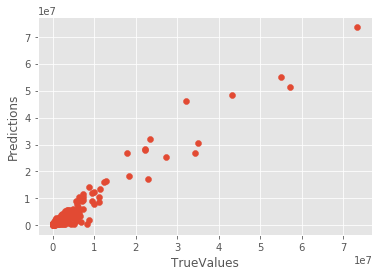

In [149]:
#Graph of True Values Vs Predicted Values
plt.scatter(y_test, y_predicted)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

# P Values of the features

In [150]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.890e+04
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:59:40   Log-Likelihood:                -50167.
No. Observations:                3118   AIC:                         1.003e+05
Df Residuals:                    3113   BIC:                         1.004e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.891e+05   3.13e+05      2.842      0.0